In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [8]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


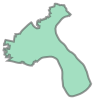

In [9]:
zipcodes.loc[0,'geometry']

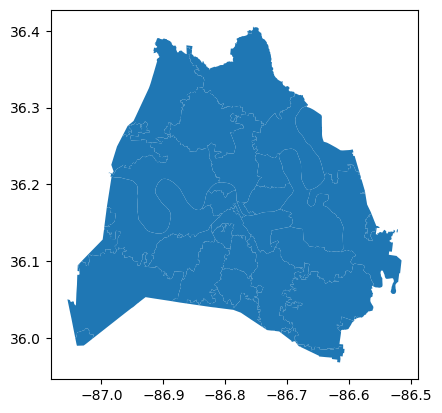

In [10]:
zipcodes.plot();

In [11]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [13]:
water_fountains = gpd.read_file('../data/water_fountains.geojson')
print(water_fountains.crs)
water_fountains.head()

epsg:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [14]:
fountains_by_zip = gpd.sjoin(water_fountains, zipcodes, op = 'within')

C:\Users\kalmc\anaconda3\envs\geospatial\lib\site-packages\geopandas\sindex.py:87: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (idx, item) in enumerate(geometry.iteritems())


In [15]:
fountains_by_zip.head()

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry,index_right,zip,po_name
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250),20,37080,JOELTON
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090),7,37221,NASHVILLE
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310),7,37221,NASHVILLE
29,Edwin Warner Dog Park Water Fountain,Dog Park,Y,46595,36.05195562,N,1,-86.90162012,Dog Only,POINT (-86.90162 36.05196),7,37221,NASHVILLE
30,Edwin Warner Concession Water Fountain,WNSL Concessions,N,46597,36.04998346,Y,1,-86.8981744,Standard/ADA,POINT (-86.89817 36.04998),7,37221,NASHVILLE


In [16]:
fountains_by_zip['zip'].value_counts()

37209    8
37221    8
37201    6
37206    6
37208    5
37207    5
37214    4
37013    4
37212    3
37218    3
37210    2
37205    2
37213    2
37228    2
37204    2
37217    2
37211    2
37203    2
37076    1
37216    1
37115    1
37215    1
37080    1
Name: zip, dtype: int64

In [21]:
fountains_in_37209 = fountains_by_zip.loc[fountains_by_zip['zip'] == '37209']
fountains_in_37209.shape               

(8, 13)

In [24]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

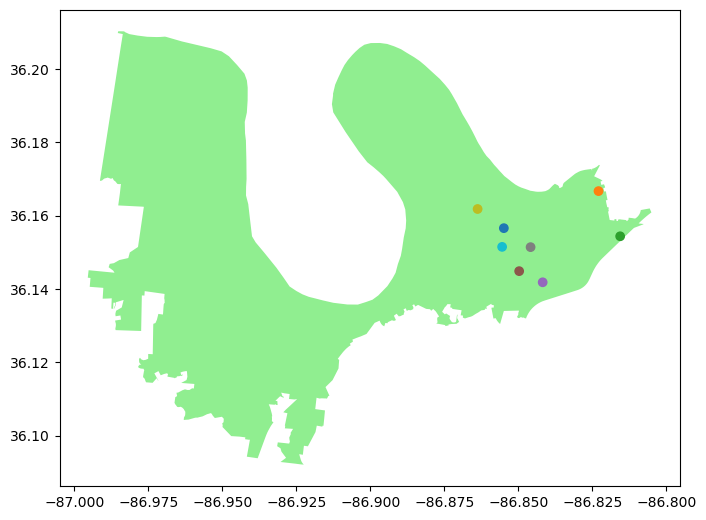

In [25]:
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
fountains_in_37209.plot( ax = ax, column = 'name');
plt.show();

In [26]:
polygon37209.geometry.centroid

C:\Users\kalmc\AppData\Local\Temp\ipykernel_32180\283130122.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37209.geometry.centroid


12    POINT (-86.91816 36.15605)
dtype: geometry

In [27]:
center = polygon37209.geometry.centroid[12]
print(center)

POINT (-86.91816342256455 36.15604558838379)


C:\Users\kalmc\AppData\Local\Temp\ipykernel_32180\3183202573.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37209.geometry.centroid[12]


In [28]:
area_center = [center.y, center.x]
print(area_center)

[36.15604558838379, -86.91816342256455]


In [34]:
map_37209 = folium.Map(location = area_center, zoom_start = 12)
map_37209

In [33]:
map_37209 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37209).add_to(map_37209)


for row_index, row_values in fountains_in_37209.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37209)
map_37209.save('../maps/map37209.html')

#display our map
map_37209